# V. Building Traffic-Collision Correspondence

Now things get interesting. With all of the data shaped up and reporting like we want it, we are now ready to build a model matching the number of motor vehicle collisions with the average annual daily traffic counts.

In [1]:
%ls "../data/aadt"

AADT_2014.dbf                AADT_2014.shx
AADT_2014.prj                AADT_2014_Localized.geojson
AADT_2014.sbn                AADT_2014_repaired.dbf
AADT_2014.sbx                AADT_2014_repaired.prj
AADT_2014.shp                AADT_2014_repaired.shp
AADT_2014.shp.xml            AADT_2014_repaired.shx


In [3]:
import geopandas as gpd
aadt = gpd.read_file("../data/aadt/AADT_2014_Localized.geojson")

In [5]:
aadt.head()

,AADT,AADT_TYPE,AADT_YEAR,BMP,BegDesc,CC_ID,CLASS_TDV,DATA_TYPE,EP,EndDesc,...,LOC_ERROR,MUNI,OBJECTID,RC_ID,ROADWAYTYP,SPEED_TDV,Shape_Leng,TDV_ROUTE,VOL_TDV,geometry
0,7847,FORECAST,2014,0.00,JEROME AVE,None,http://ftp.dot.ny.gov/tdv/YR2014/noclass.pdf,VOLUME,1.09,UNIVERSITY AVE,...,NO ERROR,City of Bronx,1,01_2030,Road,http://ftp.dot.ny.gov/tdv/YR2014/nospeed.pdf,1744.861678,OGDEN AVE,http://ftp.dot.ny.gov/tdv/YR2011/R11/01_Bronx/...,LINESTRING Z (-73.93109203821405 40.8296789857...
1,44571,FORECAST,2014,1.64,STILLWELL AVE,None,http://ftp.dot.ny.gov/tdv/YR2009/Other/Class/R...,"VOLUME, CLASS",1.92,RT 908A HUTCHINSON RIVER PKW,...,NO ERROR,City of Bronx,2,01_0906,Route,http://ftp.dot.ny.gov/tdv/YR2014/nospeed.pdf,450.350556,907F/BRONX PELHAM PK,http://ftp.dot.ny.gov/tdv/YR2009/R11/01_Bronx/...,LINESTRING Z (-73.83815363842487 40.8564730053...
2,5383,FORECAST,2014,0.00,E TREMONT AVE,None,http://ftp.dot.ny.gov/tdv/YR2014/noclass.pdf,VOLUME,1.23,E KINGSBRDG RD,...,NO ERROR,City of Bronx,3,01_2024,Road,http://ftp.dot.ny.gov/tdv/YR2014/nospeed.pdf,1981.682023,VALENTINE AVE,http://ftp.dot.ny.gov/tdv/YR2011/R11/01_Bronx/...,LINESTRING Z (-73.90146605153026 40.8480909803...
3,21308,FORECAST,2014,2.60,WHITE PLAINS R,None,http://ftp.dot.ny.gov/tdv/YR2014/noclass.pdf,VOLUME,3.48,SILVER ST,...,NO ERROR,City of Bronx,5,01_1167,Road,http://ftp.dot.ny.gov/tdv/YR2014/nospeed.pdf,1415.639161,E TREMONT AVE,http://ftp.dot.ny.gov/tdv/YR2011/R11/01_Bronx/...,LINESTRING Z (-73.86477260758522 40.8409845678...
4,15080,FORECAST,2014,4.01,PELHAM PKWY BOSTON POST RD R,None,http://ftp.dot.ny.gov/tdv/YR2007/Other/Class/R...,"VOLUME, CLASS",5.44,GUN HILL RD,...,NO ERROR,City of Bronx,6,01_0007,Route,http://ftp.dot.ny.gov/tdv/YR2014/nospeed.pdf,2290.535629,US1,http://ftp.dot.ny.gov/tdv/YR2011/R11/01_Bronx/...,LINESTRING Z (-73.86918696739427 40.8567520063...


In [58]:
import pandas as pd
mvc = pd.read_csv("../data/mvc/mvc_coordinate_counts.csv", header=None)

In [59]:
mvc.head()

,0,1
0,"(40.4989488, -74.2443651)",2
1,"(40.4991346, -74.2434848)",1
2,"(40.4994787, -74.2417278)",1
3,"(40.499659, -74.2408224)",1
4,"(40.499842, -74.2399169)",2


In [56]:
pd.read_csv?

Huh&mdash;when saving a `Series` without an index to a `CSV` file and then re

What we want to do at this point is match each of the starting points and ending points of the line segments associated with the roadways in the AADT dataset with collision hotspots from the MVC dataset.

Individual linestrings in the `geopandas` GeoDataFrame are `shapely` objects composed of (what else?) coordinates. We will want to match the first and the last with nearest points in the MVC dataset.

Notice the presence of a third `z` coordinate. According to the `shapely` [manual](http://toblerity.org/shapely/manual.html#coordinate-systems) this has no effect and may be safely ignored:

> A third z coordinate value may be used when constructing instances, but has no effect on geometric analysis. All operations are performed in the x-y plane.

In [18]:
list(aadt['geometry'].iloc[0].coords)

[(-73.93109203821405, 40.829678985754, -1.3124998304e-05),
 (-73.93112204965891, 40.829781958174706, 0.007286875001682),
 (-73.93111701855625, 40.82982199838211, 0.010086875001889),
 (-73.93109602838423, 40.829880988256626, 0.014286875001744),
 (-73.93076605374948, 40.830474007763264, 0.058986875001665),
 (-73.9307250285069, 40.83056199866503, 0.06548687500208),
 (-73.93011199308746, 40.831631992516854, 0.146386875001781),
 (-73.92974099700824, 40.832282011079926, 0.195486875001734),
 (-73.92939203643624, 40.832910973350536, 0.242886875001659),
 (-73.92853603295828, 40.83441704532603, 0.356586875002904),
 (-73.92785804019286, 40.83562001547802, 0.447386875001712),
 (-73.92721101351417, 40.836762013123796, 0.533586875001674),
 (-73.92711602145762, 40.83692300814134, 0.545786875001795),
 (-73.9266279593864, 40.83775299310434, 0.608886875001645),
 (-73.92638996674579, 40.83816101451075, 0.639786875001619),
 (-73.92617796176606, 40.838501985610804, 0.665986875001636),
 (-73.92577901076666,

If we check the types of the objects we see that while most of them match the `LineString` format, a few are `MultiLineString`.

In [31]:
aadt['geometry'].map(type).value_counts()

<class 'shapely.geometry.linestring.LineString'>              3092
<class 'shapely.geometry.multilinestring.MultiLineString'>      93
Name: geometry, dtype: int64

For the `shapely` [user manual](http://toblerity.org/shapely/manual.html):

> The point type is implemented by a Point class; curve by the LineString and LinearRing classes; and surface by a Polygon class. Shapely implements no smooth (i.e. having continuous tangents) curves. All curves must be approximated by linear splines. All rounded patches must be approximated by regions bounded by linear splines.
>
> Collections of points are implemented by a MultiPoint class, collections of curves by a MultiLineString class, and collections of surfaces by a MultiPolygon class. These collections aren’t computationally significant, but are useful for modeling certain kinds of features. A Y-shaped line feature, for example, is well modeled as a whole by a MultiLineString.



If we pull out only the `MultiLineString` paths we see that most of these features could be approximated by a line. There are a few segments with holes in them which should be contiguous, but for whatever reason aren't, resulting in a `MultiLineString` instead of our desired `LineString`.

This is important because the naive way of getting the coordinates of a shapely `LineString` is to call `.coords` on it, but this interface is not implemented for `MultiLineStrings` (which are a collection of `LineString` objects, requiring multiple seperate `.coords` calls).

In [36]:
import shapely
multis = aadt[aadt['geometry'].map(lambda f: isinstance(f, shapely.geometry.multilinestring.MultiLineString))]

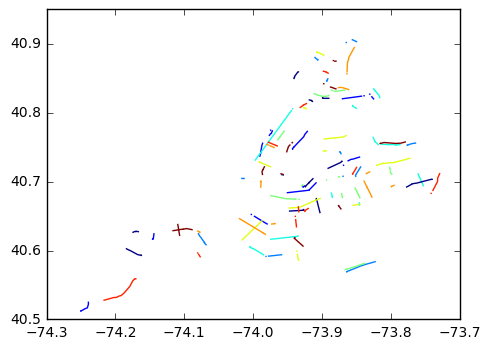

In [39]:
%matplotlib inline
multis.plot()

In [45]:
list(multis['geometry'].iloc[0][0].coords)

[(-73.89935594910806, 40.821808544660215, 1.21),
 (-73.89930499419332, 40.821796996636984, 1.212786875003076),
 (-73.89920398367697, 40.8217670261854, 1.218486875002327),
 (-73.89913904024782, 40.8217359585046, 1.222486875001778),
 (-73.89908301948287, 40.82169596766478, 1.226486875001683),
 (-73.899028958947, 40.82164500541192, 1.23098687500169)]

But since these are "lines with holes" anyway, we can simply take the first coordinate of the first line segment in the collection and last coordinates of the last line segment, which will be equivalent to taking the first and last coordinates of the total line directly, when the feature is a more simple `LineString`. We just check types to choose which path to follow.

Note the use of the `:2` indexer to slice of the unused shapely `z` coordinate.

In [49]:
def street_to_coord_pair(street):
    if isinstance(street, shapely.geometry.linestring.LineString):
        return street.coords[0][:2], street.coords[-1][:2]
    else:  # shapely.geometry.multilinestring.MultiLineString
        return street[0].coords[0][:2], street[-1].coords[-1][:2]

coord_pairs = aadt['geometry'].map(street_to_coord_pair) # (f.coords[0], f.coords[-1]))

In [50]:
coord_pairs.head()

0    ((-73.93109203821405, 40.829678985754), (-73.9...
1    ((-73.83815363842487, 40.856473005356165), (-7...
2    ((-73.90146605153026, 40.84809098034886), (-73...
3    ((-73.86477260758522, 40.84098456782766), (-73...
4    ((-73.86918696739427, 40.856752006312746), (-7...
Name: geometry, dtype: object

Now we want to match these coordinates with the coordinates that we have in the MVC data. The naive way to do this is to for every coordinate in `coord_pair` perform a search through every coordinate in `mvc`, checking the distance as we go along to narrow it down to the two closest points. This is obviously very slow and inefficient, so we'll use another abstraction that's useful for these kinds of operations: a [spatial index](https://en.wikipedia.org/wiki/Spatial_database).

The best Python spatial index module is `rtree` (named for the [r-tree data structure](https://en.wikipedia.org/wiki/R-tree) it maintains). You can read the documentation [here](http://toblerity.org/rtree/tutorial.html#creating-an-index); it's altogether very straightforward.

Installing it, however, may prove a little challenging. The following works for me (on Mac OSX):

    brew install spatialindex
    pip install rtree

But note also [this longstanding issue](https://github.com/Toblerity/rtree/issues/37) (you will get this error message if you try to run `pip install rtree` alone).

In [51]:
import rtree

Adding proper column headers to the `MVC` data so that it can be more easily read:

In [65]:
mvc.columns = ['Coordinates', 'Collisions']

In [66]:
mvc.head()

,Coordinates,Collisions
0,"(40.4989488, -74.2443651)",2
1,"(40.4991346, -74.2434848)",1
2,"(40.4994787, -74.2417278)",1
3,"(40.499659, -74.2408224)",1
4,"(40.499842, -74.2399169)",2


Coordinates are stored as a string, due to an oversight on my part at the time I made this dataset:

In [74]:
mvc.dtypes

Coordinates    object
Collisions      int64
dtype: object

That's easy enough to fix (albiet, yes, I use `eval`).

In [76]:
mvc['Coordinates'] = mvc['Coordinates'].map(eval)

In [77]:
mvc.head()

,Coordinates,Collisions
0,"(40.4989488, -74.2443651)",2
1,"(40.4991346, -74.2434848)",1
2,"(40.4994787, -74.2417278)",1
3,"(40.499659, -74.2408224)",1
4,"(40.499842, -74.2399169)",2


Now for building the index. As per the docs:

> `>>> idx.insert(0, (left, bottom, right, top))`
>
> **Note**: Inserting a point, i.e. where left == right && top == bottom, will essentially insert a single point entry into the index instead of copying extra coordinates and inserting them. There is no shortcut to explicitly insert a single point, however.

In [79]:
idx = rtree.index.Index()
for ind, coord in enumerate(mvc['Coordinates']):
    idx.insert(ind, (coord[1], coord[0], coord[1], coord[0]))  # (left, bottom, right, top)

Now we match! From the docs:

> The following finds the 1 nearest item to the given bounds. If multiple items are of equal distance to the bounds, both are returned:
>
> `>>> idx.insert(1, (left, bottom, right, top))`
>
> `>>> list(idx.nearest((1.0000001, 1.0000001, 2.0, 2.0), 1))`
>
> `[0, 1]`

Quick test:

In [88]:
long, lat = coord_pairs[0][0]
print(long, lat)
ind = list(idx.nearest((long, lat, long, lat), 1))[0]
ind

-73.93109203821405 40.829678985754


58885

In [97]:
mvc.iloc[ind]

Coordinates    (40.8294782, -73.9312248)
Collisions                            29
Name: 58885, dtype: object

In [100]:
m_long, m_lat = mvc.iloc[ind]['Coordinates'][1], mvc.iloc[ind]['Coordinates'][0]
t_srs = gpd.GeoSeries([shapely.geometry.Point(long, lat), shapely.geometry.Point(m_long, m_lat)])
plot = t_srs.plot()
import mplleaflet
mplleaflet.display()

Looking good! Let's extend this to all of the points.

In [156]:
coord_pairs[:5]

0    ((-73.93109203821405, 40.829678985754), (-73.9...
1    ((-73.83815363842487, 40.856473005356165), (-7...
2    ((-73.90146605153026, 40.84809098034886), (-73...
3    ((-73.86477260758522, 40.84098456782766), (-73...
4    ((-73.86918696739427, 40.856752006312746), (-7...
Name: geometry, dtype: object

In [122]:
nearest_start_coord = []
nearest_start_coord_collision_count = []
nearest_end_coord = []
nearest_end_coord_collision_count = []
from tqdm import tqdm_notebook
for first_coord, second_coord in tqdm_notebook(coord_pairs):
    s_x, s_y = first_coord
    e_x, e_y = second_coord
    s_ind = list(idx.nearest((s_x, s_y, s_x, s_y), 1))[0]
    s_mvc_entry = mvc.iloc[s_ind]
    nearest_start_coord.append(s_mvc_entry['Coordinates'])
    nearest_start_coord_collision_count.append(s_mvc_entry['Collisions'])
    e_ind = list(idx.nearest((e_x, e_y, e_x, e_y), 1))[0]
    e_mvc_entry = mvc.iloc[e_ind]
    nearest_end_coord.append(e_mvc_entry['Coordinates'])
    nearest_end_coord_collision_count.append(e_mvc_entry['Collisions'])

^^ WIP.

Reverse the order to match `shapely` coordinate order (`x`, `y`):

In [124]:
nearest_start_coord = [c[::-1] for c in nearest_start_coord]
nearest_end_coord = [c[::-1] for c in nearest_end_coord]

In [125]:
nearest_end_coord[:5]

[(-73.9236232, 40.8442372),
 (-73.8332241, 40.8556199),
 (-73.8940255, 40.8648924),
 (-73.848478, 40.8430239),
 (-73.8535761, 40.8732771)]

Attach it to the dataset:

In [126]:
aadt_c = aadt[['AADT', 'AADT_TYPE', 'AADT_YEAR', 'BMP', 'BegDesc', 'EndDesc', 'EP', 'GISID', 'LEN', 'MUNI', 'RC_ID', 'ROADWAYTYP', 'Shape_Leng', 'geometry']]
aadt_c['MVC_START_COORD'] = nearest_start_coord
aadt_c['MVC_END_COORD'] = nearest_end_coord
aadt_c['MVC_START'] = nearest_start_coord_collision_count
aadt_c['MVC_END'] = nearest_end_coord_collision_count
aadt_c.head()

/Users/Honors/anaconda/envs/nyc-traffic-model/lib/python3.5/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/Users/Honors/anaconda/envs/nyc-traffic-model/lib/python3.5/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/Users/Honors/anaconda/envs/nyc-traffic-model/lib/python3.5/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.


,AADT,AADT_TYPE,AADT_YEAR,BMP,BegDesc,EndDesc,EP,GISID,LEN,MUNI,RC_ID,ROADWAYTYP,Shape_Leng,geometry,MVC_START_COORD,MVC_END_COORD,MVC_START,MVC_END
0,7847,FORECAST,2014,0.00,JEROME AVE,UNIVERSITY AVE,1.09,25594001,1.09,City of Bronx,01_2030,Road,1744.861678,LINESTRING Z (-73.93109203821405 40.8296789857...,"(-73.9312248, 40.8294782)","(-73.9236232, 40.8442372)",29,28
1,44571,FORECAST,2014,1.64,STILLWELL AVE,RT 908A HUTCHINSON RIVER PKW,1.92,10053801,0.28,City of Bronx,01_0906,Route,450.350556,LINESTRING Z (-73.83815363842487 40.8564730053...,"(-73.8381748, 40.8575075)","(-73.8332241, 40.8556199)",1,6
2,5383,FORECAST,2014,0.00,E TREMONT AVE,E KINGSBRDG RD,1.23,25602301,1.23,City of Bronx,01_2024,Road,1981.682023,LINESTRING Z (-73.90146605153026 40.8480909803...,"(-73.9010217, 40.8476674)","(-73.8940255, 40.8648924)",150,2
3,21308,FORECAST,2014,2.60,WHITE PLAINS R,SILVER ST,3.48,25584601,0.88,City of Bronx,01_1167,Road,1415.639161,LINESTRING Z (-73.86477260758522 40.8409845678...,"(-73.8644784, 40.8410869)","(-73.848478, 40.8430239)",132,1
4,15080,FORECAST,2014,4.01,PELHAM PKWY BOSTON POST RD R,GUN HILL RD,5.44,10001102,1.43,City of Bronx,01_0007,Route,2290.535629,LINESTRING Z (-73.86918696739427 40.8567520063...,"(-73.8690089, 40.8565997)","(-73.8535761, 40.8732771)",2,7


First, let's check the closeness of the `MVC_START_COORD` and `MVC_END_COORD` matches. To do this we can compute a new column for distance between the linestring endpoints and the respective start and coordinates.

`shapely` provides a `distance` function, but since geoditic distance is considered out-of-scope for the `shapely` package overall this distance function merely returns the Cartesian distance between two points (that is, it treats the Earth as a flat surface). This doesn't matter at all for the tiny distances we are computing from a computational perspective, but since the end result is in arc-units and I'm not sure how much an arc unit is in New York City, the resulting figure is difficult for me to interpret.

So I just went with using `pyproj` and an actual [great-circle distance](https://en.wikipedia.org/wiki/Great-circle_distance) calculation, which fetches a result in meters.

For more info see [here](http://gis.stackexchange.com/questions/80881/what-is-the-unit-the-shapely-length-attribute).

In [144]:
import pyproj
geod = pyproj.Geod(ellps='WGS84')

def dist_s(srs):
    geom = srs['geometry']
    aadt_s, _ = street_to_coord_pair(geom)
    mvc_s = srs['MVC_START_COORD']
    angle1, angle2, distance = geod.inv(aadt_s[0], aadt_s[1], mvc_s[0], mvc_s[1])
    return distance  # in meters
    # return shapely.geometry.Point(aadt_s[0], aadt_s[1]).distance(shapely.geometry.Point(mvc_s[0], mvc_s[1]))

In [138]:
tqdm_notebook().pandas()

In [145]:
s_dists = aadt_c.progress_apply(dist_s, axis='columns')

In [148]:
s_dists[:10]

0     24.951617
1    114.895670
2     60.139634
3     27.291144
4     22.616380
5      5.197127
6      2.338001
7      8.787273
8      5.768530
9     36.210035
dtype: float64

In [159]:
def dist_e(srs):
    geom = srs['geometry']
    _, aadt_e = street_to_coord_pair(geom)
    mvc_e = srs['MVC_END_COORD']
    angle1, angle2, distance = geod.inv(aadt_e[0], aadt_e[1], mvc_e[0], mvc_e[1])
    return distance  # in meters
    # return shapely.geometry.Point(aadt_s[0], aadt_s[1]).distance(shapely.geometry.Point(mvc_s[0], mvc_s[1]))

In [160]:
e_dists = aadt_c.progress_apply(dist_e, axis='columns')

In [161]:
e_dists[:10]

0     2.820690
1    49.821446
2     0.773816
3    21.152265
4     7.632099
5     2.465165
6     3.742979
7     8.397914
8    37.396344
9    42.407424
dtype: float64

Looks like we achieve an average point-to-point distance of just 28 meters!

In [162]:
s_dists.mean()

27.9376482537564

In [163]:
e_dists.mean()

27.996371355823911

A quick histogram shows that there are a few entries in the overall which are extremely skewed, indicating errors of some kind:

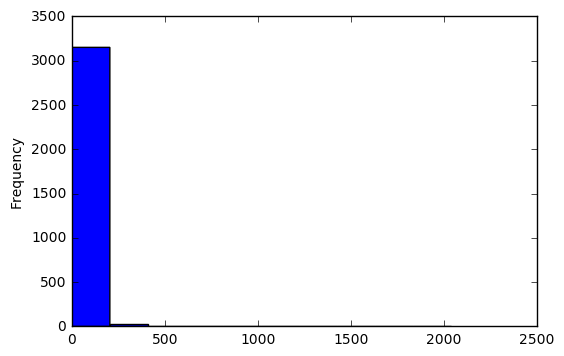

In [164]:
s_dists.plot(kind='hist')

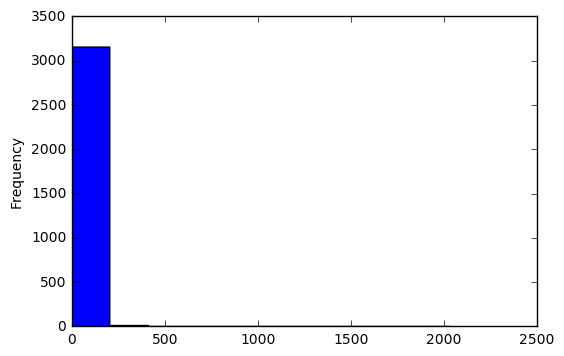

In [165]:
e_dists.plot(kind='hist')

Remembering the picture of the state data from when we were first looking at it, I recall that there was a line segment off on its own east of the Bronx which looked a little suspicious, but it didn't look so bad that I was ready to call it there and then. Let's take a look at the high end of the tail distribution:

In [168]:
e_dists[e_dists > 1000]

2453    1883.991071
2454    2024.908516
2455    1779.868981
2456    2030.987634
dtype: float64

Ah, interesting, it's not a single entry at all, but a lot of them!

In [182]:
print("{0:.2f}% of start entries have error > 100 meters".format(len(s_dists[s_dists > 100]) / len(s_dists) * 100))
print("{0:.2f}% of end entries have error > 200 meters".format(len(s_dists[s_dists > 200]) / len(s_dists) * 100))
print("{0:.2f}% of start entries have error > 500 meters".format(len(s_dists[s_dists > 500]) / len(s_dists) * 100))
print("{0:.2f}% of start entries have error > 1000 meters".format(len(s_dists[s_dists > 1000]) / len(s_dists) * 100))

3.33% of start entries have error > 100 meters
1.10% of end entries have error > 200 meters
0.35% of start entries have error > 500 meters
0.19% of start entries have error > 1000 meters


In [181]:
print("{0:.2f}% of end entries have error > 100 meters".format(len(e_dists[e_dists > 100]) / len(e_dists) * 100))
print("{0:.2f}% of end entries have error > 200 meters".format(len(e_dists[e_dists > 200]) / len(e_dists) * 100))
print("{0:.2f}% of end entries have error > 500 meters".format(len(e_dists[e_dists > 500]) / len(e_dists) * 100))
print("{0:.2f}% of end entries have error > 1000 meters".format(len(e_dists[e_dists > 1000]) / len(e_dists) * 100))

3.23% of end entries have error > 100 meters
0.97% of end entries have error > 200 meters
0.35% of end entries have error > 500 meters
0.13% of end entries have error > 1000 meters


Where are these errors coming from? Let's attach entries to the data now so that we have context.

In [203]:
aadt_c['START_ERROR'] = s_dists
aadt_c['END_ERROR'] = e_dists

/Users/Honors/anaconda/envs/nyc-traffic-model/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/Users/Honors/anaconda/envs/nyc-traffic-model/lib/python3.5/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [205]:
aadt_c.head()

,AADT,AADT_TYPE,AADT_YEAR,BMP,BegDesc,EndDesc,EP,GISID,LEN,MUNI,RC_ID,ROADWAYTYP,Shape_Leng,geometry,MVC_START_COORD,MVC_END_COORD,MVC_START,MVC_END,START_ERROR,END_ERROR
0,7847,FORECAST,2014,0.00,JEROME AVE,UNIVERSITY AVE,1.09,25594001,1.09,City of Bronx,01_2030,Road,1744.861678,LINESTRING Z (-73.93109203821405 40.8296789857...,"(-73.9312248, 40.8294782)","(-73.9236232, 40.8442372)",29,28,24.951617,2.820690
1,44571,FORECAST,2014,1.64,STILLWELL AVE,RT 908A HUTCHINSON RIVER PKW,1.92,10053801,0.28,City of Bronx,01_0906,Route,450.350556,LINESTRING Z (-73.83815363842487 40.8564730053...,"(-73.8381748, 40.8575075)","(-73.8332241, 40.8556199)",1,6,114.895670,49.821446
2,5383,FORECAST,2014,0.00,E TREMONT AVE,E KINGSBRDG RD,1.23,25602301,1.23,City of Bronx,01_2024,Road,1981.682023,LINESTRING Z (-73.90146605153026 40.8480909803...,"(-73.9010217, 40.8476674)","(-73.8940255, 40.8648924)",150,2,60.139634,0.773816
3,21308,FORECAST,2014,2.60,WHITE PLAINS R,SILVER ST,3.48,25584601,0.88,City of Bronx,01_1167,Road,1415.639161,LINESTRING Z (-73.86477260758522 40.8409845678...,"(-73.8644784, 40.8410869)","(-73.848478, 40.8430239)",132,1,27.291144,21.152265
4,15080,FORECAST,2014,4.01,PELHAM PKWY BOSTON POST RD R,GUN HILL RD,5.44,10001102,1.43,City of Bronx,01_0007,Route,2290.535629,LINESTRING Z (-73.86918696739427 40.8567520063...,"(-73.8690089, 40.8565997)","(-73.8535761, 40.8732771)",2,7,22.616380,7.632099


In [206]:
aadt_c[aadt_c['START_ERROR'] > 1000]

,AADT,AADT_TYPE,AADT_YEAR,BMP,BegDesc,EndDesc,EP,GISID,LEN,MUNI,RC_ID,ROADWAYTYP,Shape_Leng,geometry,MVC_START_COORD,MVC_END_COORD,MVC_START,MVC_END,START_ERROR,END_ERROR
2250,53330,FORECAST,2014,0.0,JFK AIRPORT MAIN ENTRANCE,RT 27 SOUTHERN PKWY UNDER,2.33,10045801,2.33,City of Queens,05_0076,Route,3750.883772,LINESTRING Z (-73.78659799141164 40.6452089683...,"(-73.7787163, 40.6615955)","(-73.8018365, 40.665881)",3,6,1937.929713,7.573745
2453,6078,FORECAST,2014,0.0,I678 NB (OFF),N SERVICE RD,0.11,27659701,0.11,City of Queens,05_3197,Ramp,179.310299,LINESTRING Z (-73.79681801467301 40.6447470322...,"(-73.8029921, 40.6622052)","(-73.8029921, 40.6622052)",4,4,2007.770905,1883.991071
2454,6635,FORECAST,2014,0.0,S SERVICE RD,I678 SB (ON),0.10,27660001,0.10,City of Queens,05_3196,Ramp,158.527986,LINESTRING Z (-73.79844799600144 40.6442050289...,"(-73.8029921, 40.6622052)","(-73.8029921, 40.6622052)",4,4,2035.479089,2024.908516
2455,1266,FORECAST,2014,0.0,N SERVICE RD,I678 NB (ON),0.16,27659801,0.16,City of Queens,05_3195,Ramp,260.065269,LINESTRING Z (-73.79835595619008 40.6456110172...,"(-73.8029921, 40.6622052)","(-73.8029921, 40.6622052)",4,4,1883.991071,1779.868981
2456,504,FORECAST,2014,0.0,I678 SB (OFF),S SERVICE RD,0.19,27659901,0.19,City of Queens,05_3194,Ramp,312.472869,LINESTRING Z (-73.80093403661961 40.6460900452...,"(-73.8029921, 40.6622052)","(-73.8029921, 40.6622052)",4,4,1797.988084,2030.987634
2899,76035,ACTUAL,2014,0.0,NEW JERSEY STATE LINE,START 278I/440 OLAP,1.80,10023601,1.80,City of Staten Island,06_0001,Route,2897.937430,LINESTRING Z (-74.19699997897307 40.6356590344...,"(-74.1862235, 40.6305069)","(-74.1691997, 40.621337)",3,17,1076.341016,26.389276


Let's start with entries with error rates of over a kilometer, which are clearly unusable.

In [197]:
import matplotlib.pyplot as plt
ax = aadt_c[aadt_c['START_ERROR'] > 1000].plot()
for l in ax.lines:
    l.set_linewidth(4)
mplleaflet.display()

JFK and the New Jersey turnpike. Makes sense.

Good MVT data extends only to major local streets; highway accident rates are not metricated, and, per my explanation in the introduction, we don't need it. I wonder if we can't use the `ROADWAYTYP` parameter as a filter&mdash;after all, the top entries that we are seeing here are all `Route` or `Ramp` types, which are relatively rare with respect to `Road`, and seem to correspond with highway/roadway segments, *not* our local streets.

In [198]:
aadt_c['ROADWAYTYP'].value_counts()

Road     2404
Ramp      485
Route     296
Name: ROADWAYTYP, dtype: int64

Do these have significantly different distributions?

In [ ]:
, aadt_c.query("'ROADWAYTYP' == 'Ramp'").mean(), aadt_c.query("'ROADWAYTYP' == 'Route'").mean()

In [208]:
aadt_c.query("ROADWAYTYP == 'Road'")[['START_ERROR', 'END_ERROR']].mean()

START_ERROR    18.494829
END_ERROR      19.870245
dtype: float64

In [209]:
aadt_c.query("ROADWAYTYP == 'Ramp'")[['START_ERROR', 'END_ERROR']].mean()

START_ERROR    56.431307
END_ERROR      55.413063
dtype: float64

In [211]:
aadt_c.query("ROADWAYTYP == 'Route'")[['START_ERROR', 'END_ERROR']].mean()

START_ERROR    57.941407
END_ERROR      49.071074
dtype: float64

Ramps and routes do indeed have a much statistically higher error. Following up on our hypothesis, what road segments do they correspond with?

In [215]:
import matplotlib.pyplot as plt
ax = aadt_c.query("ROADWAYTYP == 'Ramp'").plot()
for l in ax.lines:
    l.set_linewidth(4)
mplleaflet.display()

In [216]:
import matplotlib.pyplot as plt
ax = aadt_c.query("ROADWAYTYP == 'Route'").plot()
for l in ax.lines:
    l.set_linewidth(4)
mplleaflet.display()

Aha!

Let's recap. The AADT state data includes information on major roadway segments in New York City, which includes both major local streets (which, per our analysis above, corresponds with `ROADWAYTYP == 'Road'`), roadways and highways within the city (`ROADWAYTYP == 'Route'`), and ramps on and off those roadways and highways (`ROADWAYTYP = 'Ramp'`). The purpose of this project is to extend those figures to local roads, using the NYPD's motor vehicle collision dataset as a model input. But this dataset is street-level, lacking complete information on collisions on ramps and roadways&mdash;exactly the data with the classifications we've discerned above.

At this point we can remove these not-useful secondary entities by specifying `ROADWAYTYP == 'Road'`!

In [217]:
aadt_cf = aadt_c.query("ROADWAYTYP == 'Road'")

We lose some number of entries:

In [219]:
len(aadt_c)

3185

In [218]:
len(aadt_cf)

2404

But gain a great deal of matching accuracy:

In [222]:
aadt_c['START_ERROR'].mean(), aadt_cf['START_ERROR'].mean()

(27.9376482537564, 18.494829287517295)

In [223]:
aadt_c['END_ERROR'].mean(), aadt_cf['END_ERROR'].mean()

(27.996371355823911, 19.870245083224908)

Our average matching accuracy is down to ~20 meters!

There are still a few outliers, though nowhere near as extreme:

In [228]:
len(aadt_cf[(aadt_cf['START_ERROR'] > 50) | (aadt_cf['END_ERROR'] > 50)])

352

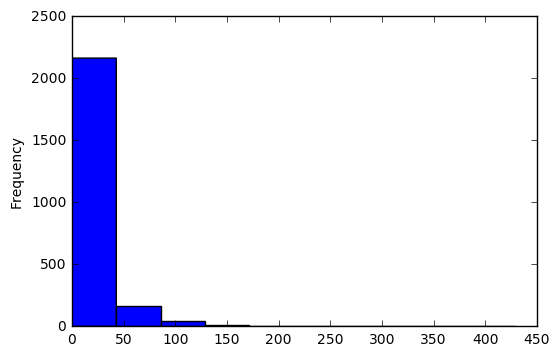

In [224]:
aadt_cf['START_ERROR'].plot(kind='hist')

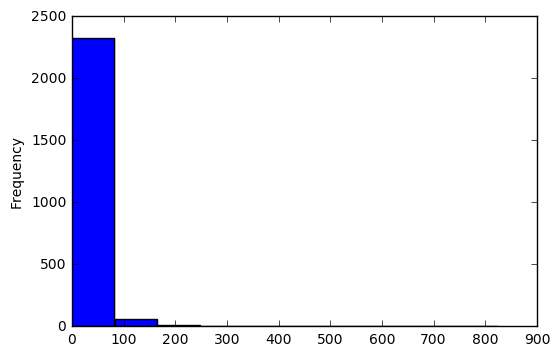

In [229]:
aadt_cf['END_ERROR'].plot(kind='hist')

In [231]:
aadt_cf[aadt_cf['END_ERROR'] > 500]

,AADT,AADT_TYPE,AADT_YEAR,BMP,BegDesc,EndDesc,EP,GISID,LEN,MUNI,RC_ID,ROADWAYTYP,Shape_Leng,geometry,MVC_START_COORD,MVC_END_COORD,MVC_START,MVC_END,START_ERROR,END_ERROR
14,16744,FORECAST,2014,5.55,E 233RD ST,WESTCHESTER CO LINE,6.33,25589901,0.78,City of Bronx,01_1191,Road,1255.366041,LINESTRING Z (-73.88013489061336 40.8944981764...,"(-73.8802778, 40.8941045)","(-73.8738882, 40.8989667)",1,5,45.346871,824.220617
2906,11485,FORECAST,2014,0.00,19TH AVE,ISLAND KING RD,0.98,25742601,0.98,City of Queens,05_8052,Road,1576.729949,LINESTRING Z (-73.89288501078795 40.7738029939...,"(-73.8928888, 40.7738078)","(-73.8841609, 40.793276)",64,1,0.622234,740.667537


We expect `MVC_START` to be relatively similar to `MVC_END` (we will analyze the pattern of this in the next notebook). Is there any correlation between matching inaccuracy and crashrate distance?

In [264]:
import numpy as np
diffs = pd.DataFrame()
diffs['Mean Coordinate Error'] =  ((aadt_cf['START_ERROR'] + aadt_cf['END_ERROR']) / 2).values
diffs['Collision Difference'] = np.abs(aadt_cf['MVC_START'] - aadt_cf['MVC_END']).values

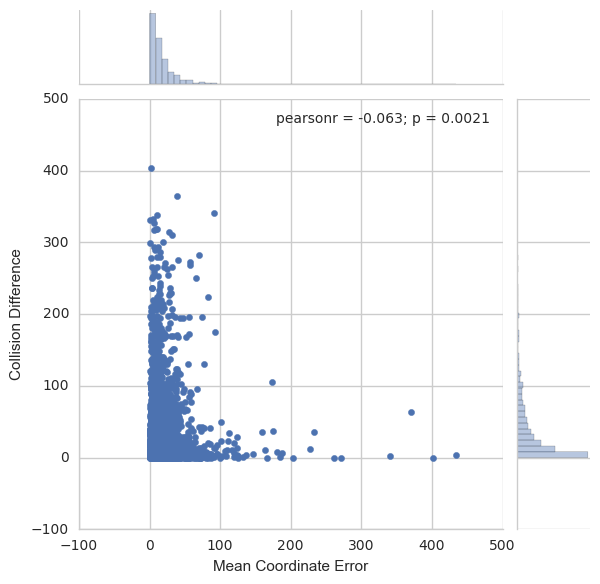

In [266]:
sns.set_style("whitegrid")
sns.jointplot('Mean Coordinate Error', 'Collision Difference', data=diffs)

No. This is a surprising result, and worrisome.

Nevertheless, I want to sheer off entries with coordinate error greater than or equal to 100.

In [270]:
aadt_cff = aadt_cf[(aadt_cf['START_ERROR'] <= 100) & (aadt_cf['END_ERROR'] <= 100)]

In [271]:
len(aadt_cf)

2404

In [272]:
len(aadt_cff)

2308

Which brings us to:

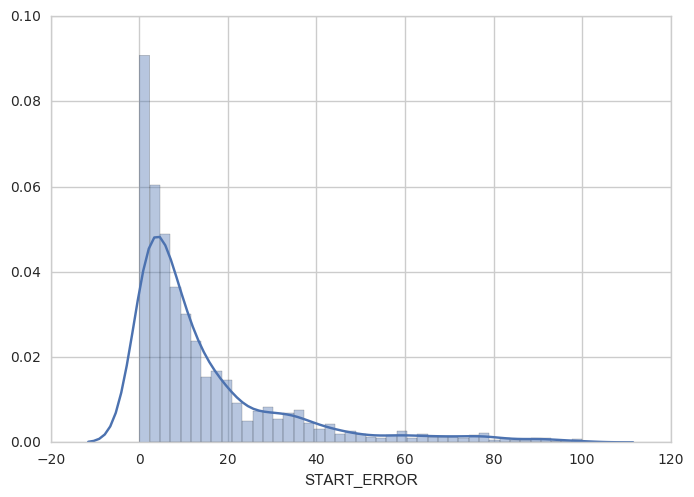

In [275]:
import seaborn as sns
sns.set_style("whitegrid")
sns.distplot(aadt_cff['START_ERROR'])

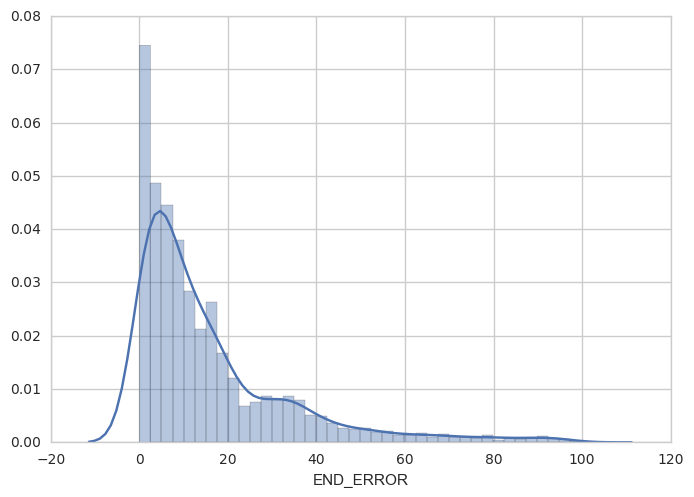

In [274]:
import seaborn as sns
sns.set_style("whitegrid")
sns.distplot(aadt_cff['END_ERROR'])

That's it. But before we save the data and move on to the next task&mdash;attempting to build a viable model&mdash;let's do one more thing.

At the moment, `MVC_START` and `MVC_END` correspond with the number of collisions experienced at the chosen coordinate which occurred throughout the timespan recorded in the dataset. For purposes of interpretation, it would be helpful to regularize it instead to an annual rate. Let's do that now.

In [277]:
mvc_d = pd.read_csv("../data/mvc/mvc.csv", index_col=0)

In [278]:
mvc_d.head()

,DATE,TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,UNIQUE KEY,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,07/27/2016,7:15,MANHATTAN,10065.0,40.763366,-73.959241,"(40.7633655, -73.9592408)",1 AVENUE,EAST 65 STREET,NaN,...,Unspecified,NaN,NaN,NaN,3489259,PASSENGER VEHICLE,PASSENGER VEHICLE,NaN,NaN,NaN
1,07/27/2016,7:30,BROOKLYN,11233.0,40.679748,-73.928650,"(40.679748, -73.92865)",REID AVENUE,MARION STREET,NaN,...,Unspecified,NaN,NaN,NaN,3502510,PASSENGER VEHICLE,PASSENGER VEHICLE,NaN,NaN,NaN
2,07/27/2016,7:35,BROOKLYN,11208.0,40.671341,-73.881939,"(40.6713407, -73.8819394)",SUTTER AVENUE,LINWOOD STREET,NaN,...,Unspecified,NaN,NaN,NaN,3488903,PASSENGER VEHICLE,PASSENGER VEHICLE,NaN,NaN,NaN
3,04/10/2016,4:10,NaN,NaN,NaN,NaN,NaN,LAUREL HILL BOULEVARD,47 STREET,NaN,...,Driver Inattention/Distraction,Driver Inattention/Distraction,NaN,NaN,3425816,PASSENGER VEHICLE,PASSENGER VEHICLE,PASSENGER VEHICLE,NaN,NaN
4,04/10/2016,4:15,QUEENS,11373.0,40.748472,-73.870016,"(40.7484722, -73.8700155)",WARREN STREET,40 ROAD,NaN,...,Driver Inattention/Distraction,NaN,NaN,NaN,3427103,PASSENGER VEHICLE,PASSENGER VEHICLE,NaN,NaN,NaN


To do that, we need to convert the time strings to timestamps, then find their minimum and maximum.

In [284]:
mvc_dates = mvc_d['DATE']

In [285]:
mvc_dates.head()

0    07/27/2016
1    07/27/2016
2    07/27/2016
3    04/10/2016
4    04/10/2016
Name: DATE, dtype: object

We could theoretically convert this using `pd.to_datetime`, but that tends to be slow. It's faster to do a string parse ourselves, given the reliable format.

In [297]:
mvc_dates_c = mvc_dates.map(lambda d: pd.Timestamp(d[-4:] + "-" + d[:2] + "-" + d[3:5]))

In [304]:
min_t, max_t = np.min(mvc_dates_c.values), np.max(mvc_dates_c.values)
delta_t = (max_t - min_t).astype('timedelta64[D]')  # convert from timedelta64[ns], e.g. nanoseconds

In [310]:
delta_t

numpy.timedelta64(1549,'D')

How many years of data?

In [313]:
years = (delta_t.astype(int) / 365)
years

4.2438356164383562

Divide that through. I'll call this new metric `AMVC`, "annual [mean] motor vehicle collisions".

In [352]:
aadt_cfft = aadt_cff.copy()
aadt_cfft['AMVC_START'] = aadt_cff['MVC_START'].map(lambda n: n / years)
aadt_cfft['AMVC_END'] = aadt_cff['MVC_END'].map(lambda n: n / years)

In [353]:
del aadt_cfft['MVC_START']
del aadt_cfft['MVC_END']

In [354]:
aadt_cfft.head()

,AADT,AADT_TYPE,AADT_YEAR,BMP,BegDesc,EndDesc,EP,GISID,LEN,MUNI,RC_ID,ROADWAYTYP,Shape_Leng,geometry,MVC_START_COORD,MVC_END_COORD,START_ERROR,END_ERROR,AMVC_START,AMVC_END
0,7847,FORECAST,2014,0.0,JEROME AVE,UNIVERSITY AVE,1.09,25594001,1.09,City of Bronx,01_2030,Road,1744.861678,LINESTRING Z (-73.93109203821405 40.8296789857...,"(-73.9312248, 40.8294782)","(-73.9236232, 40.8442372)",24.951617,2.820690,6.833441,6.597805
2,5383,FORECAST,2014,0.0,E TREMONT AVE,E KINGSBRDG RD,1.23,25602301,1.23,City of Bronx,01_2024,Road,1981.682023,LINESTRING Z (-73.90146605153026 40.8480909803...,"(-73.9010217, 40.8476674)","(-73.8940255, 40.8648924)",60.139634,0.773816,35.345384,0.471272
3,21308,FORECAST,2014,2.6,WHITE PLAINS R,SILVER ST,3.48,25584601,0.88,City of Bronx,01_1167,Road,1415.639161,LINESTRING Z (-73.86477260758522 40.8409845678...,"(-73.8644784, 40.8410869)","(-73.848478, 40.8430239)",27.291144,21.152265,31.103938,0.235636
5,15699,FORECAST,2014,0.4,BOSTON RD,E 233RD ST,0.92,25573001,0.52,City of Bronx,01_1106,Road,836.201775,LINESTRING Z (-73.83876496360224 40.8813099830...,"(-73.8387425, 40.8812664)","(-73.841962, 40.8884565)",5.197127,2.465165,34.874112,25.684312
6,8344,FORECAST,2014,0.6,METCALF AVE,PUGSLEY AVE,1.42,25600701,0.82,City of Bronx,01_2043,Road,1316.331740,LINESTRING Z (-73.87097401539016 40.8225599646...,"(-73.8710016, 40.822562)","(-73.8556487, 40.8246325)",2.338001,3.742979,14.373790,7.304713


One more thing, seperate the coordinate out into fields (we can't write tuples to `geojson`).

In [355]:
aadt_cfft['MVC_START_X'] = aadt_cfft['MVC_START_COORD'].map(lambda c: c[0])
aadt_cfft['MVC_START_Y'] = aadt_cfft['MVC_START_COORD'].map(lambda c: c[1])
aadt_cfft['MVC_END_X'] = aadt_cfft['MVC_END_COORD'].map(lambda c: c[0])
aadt_cfft['MVC_END_Y'] = aadt_cfft['MVC_END_COORD'].map(lambda c: c[1])
del aadt_cfft['MVC_START_COORD']
del aadt_cfft['MVC_END_COORD']

In [356]:
aadt_cfft.head()

,AADT,AADT_TYPE,AADT_YEAR,BMP,BegDesc,EndDesc,EP,GISID,LEN,MUNI,...,Shape_Leng,geometry,START_ERROR,END_ERROR,AMVC_START,AMVC_END,MVC_START_X,MVC_START_Y,MVC_END_X,MVC_END_Y
0,7847,FORECAST,2014,0.0,JEROME AVE,UNIVERSITY AVE,1.09,25594001,1.09,City of Bronx,...,1744.861678,LINESTRING Z (-73.93109203821405 40.8296789857...,24.951617,2.820690,6.833441,6.597805,-73.931225,40.829478,-73.923623,40.844237
2,5383,FORECAST,2014,0.0,E TREMONT AVE,E KINGSBRDG RD,1.23,25602301,1.23,City of Bronx,...,1981.682023,LINESTRING Z (-73.90146605153026 40.8480909803...,60.139634,0.773816,35.345384,0.471272,-73.901022,40.847667,-73.894025,40.864892
3,21308,FORECAST,2014,2.6,WHITE PLAINS R,SILVER ST,3.48,25584601,0.88,City of Bronx,...,1415.639161,LINESTRING Z (-73.86477260758522 40.8409845678...,27.291144,21.152265,31.103938,0.235636,-73.864478,40.841087,-73.848478,40.843024
5,15699,FORECAST,2014,0.4,BOSTON RD,E 233RD ST,0.92,25573001,0.52,City of Bronx,...,836.201775,LINESTRING Z (-73.83876496360224 40.8813099830...,5.197127,2.465165,34.874112,25.684312,-73.838742,40.881266,-73.841962,40.888456
6,8344,FORECAST,2014,0.6,METCALF AVE,PUGSLEY AVE,1.42,25600701,0.82,City of Bronx,...,1316.331740,LINESTRING Z (-73.87097401539016 40.8225599646...,2.338001,3.742979,14.373790,7.304713,-73.871002,40.822562,-73.855649,40.824632


Ok, let's save.

In [358]:
aadt_cfft.to_file("../data/interm/aadt_mvc_combined.geojson", driver='GeoJSON')